In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [63]:
import pickle

In [64]:
with open('df_unsw_train50_with_preprocessing_getdummies_standadscaler', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (888903, 209)
X teste =  (380959, 209)
y multiclasse treino =  (888903,)
y multiclasse teste =  (380959,)
y binário treino =  (888903,)
y binário teste =  (380959,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[-0.01748416, -0.01043913, -0.22852587, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01451114, -0.05162145, -0.21763962, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.0138642 , -0.07942324, -0.19117479, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       ...,
       [-0.01757447, -0.08518431, -0.24293137, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01757443, -0.08518431, -0.24293137, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01689867,  0.00305292,  0.21032584, ..., -0.00662391,
        -0.1405063 , -0.0077944 ]])

In [6]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

152963      Benign
627588      Benign
37398       Benign
486419      Benign
1203796     Benign
            ...   
110268      Benign
259178      Benign
131932     Generic
671155     Generic
121958      Benign
Name: Label_multiclass, Length: 888903, dtype: object
152963     0
627588     0
37398      0
486419     0
1203796    0
          ..
110268     0
259178     0
131932     1
671155     1
121958     0
Name: Label_binary, Length: 888903, dtype: int64


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [65]:
with open('df_unsw_test50_with_preprocessing_getdummies_standadscaler', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [11]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1269864, 209)
y multiclasse =  (1269864,)
y binário =  (1269864,)


In [12]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [14]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [17]:
#X_test50.head()
X_test50

array([[-0.0175557 , -0.08488696, -0.24198117, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.0175575 , -0.08458962, -0.24188733, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01757438, -0.0823967 , -0.24293137, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       ...,
       [-0.01748007, -0.04924269, -0.22879568, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [ 0.01233876,  0.16659285,  2.97259296, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01706993,  0.60331879, -0.22310621, ..., -0.00662391,
        -0.1405063 , -0.0077944 ]])

In [18]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Benign' ... 'Benign' 'Benign' 'Benign']
[0 0 0 ... 0 0 0]


# Algoritmo kNN para Train e Validation - Train50

In [66]:
from sklearn.neighbors import KNeighborsClassifier

### Predição train50 binária

In [67]:
knn_train50_binary = KNeighborsClassifier(n_neighbors=4, p=2)

In [68]:
knn_train50_binary.fit(X_train50_train, y_train50_binary_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
predict_train50_binary = knn_train50_binary.predict(X_train50_test)

In [23]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.996566559656026

### Visualização da árvore binária

In [26]:
#from sklearn import tree
#from dtreeviz.trees import dtreeviz
#from matplotlib import pyplot as plt
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

In [27]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [28]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

In [29]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [69]:
knn_train50_multiclass =  KNeighborsClassifier(n_neighbors=4, p=2)

In [70]:
knn_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
predict_train50_multiclass = knn_train50_multiclass.predict(X_train50_test)

In [33]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [34]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [35]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9795936045611208

### Visualização da árvore multiclasse

In [36]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [37]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

In [38]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

In [39]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [40]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.997521  0.998552  0.998036    332789
           1   0.989922  0.982852  0.986374     48170

    accuracy                       0.996567    380959
   macro avg   0.993721  0.990702  0.992205    380959
weighted avg   0.996560  0.996567  0.996561    380959



In [41]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.098196  0.125641  0.110236       390
      Backdoor   0.037572  0.036827  0.037196       353
        Benign   0.997362  0.998567  0.997964    332789
           DoS   0.318550  0.336046  0.327064      2458
      Exploits   0.629008  0.687752  0.657070      6703
       Fuzzers   0.693313  0.630285  0.660298      3619
       Generic   0.995204  0.977411  0.986227     32272
Reconnaissance   0.778883  0.665250  0.717596      2118
     Shellcode   0.689320  0.620087  0.652874       229
         Worms   0.000000  0.000000  0.000000        28

      accuracy                       0.979594    380959
     macro avg   0.523741  0.507787  0.514652    380959
  weighted avg   0.980147  0.979594  0.979797    380959



### Cross Validation do train50

In [42]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(knn_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [43]:
score_cv_train50_binary

array([0.99663633, 0.99653508, 0.99623134, 0.99659129, 0.99628755,
       0.99643379, 0.99637755, 0.99652379, 0.99640004, 0.9961413 ])

In [44]:
cv_result_train50_binary

[0.9964158067243203]

In [45]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(knn_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [46]:
score_cv_train50_multiclass

array([0.97951424, 0.98003172, 0.97908675, 0.98004275, 0.97894026,
       0.97900776, 0.97952526, 0.97952526, 0.97945776, 0.97890651])

In [47]:
cv_result_train50_multiclass

[0.9794038264903729]

### Matriz de Confusão do train50

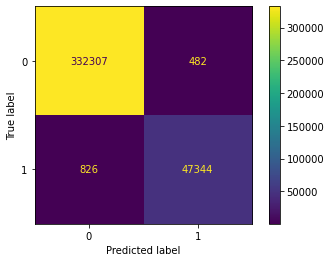

In [48]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

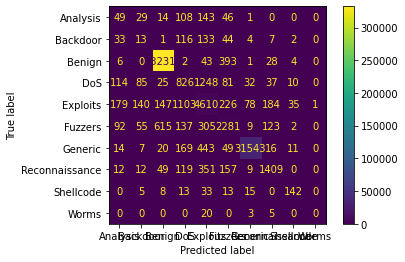

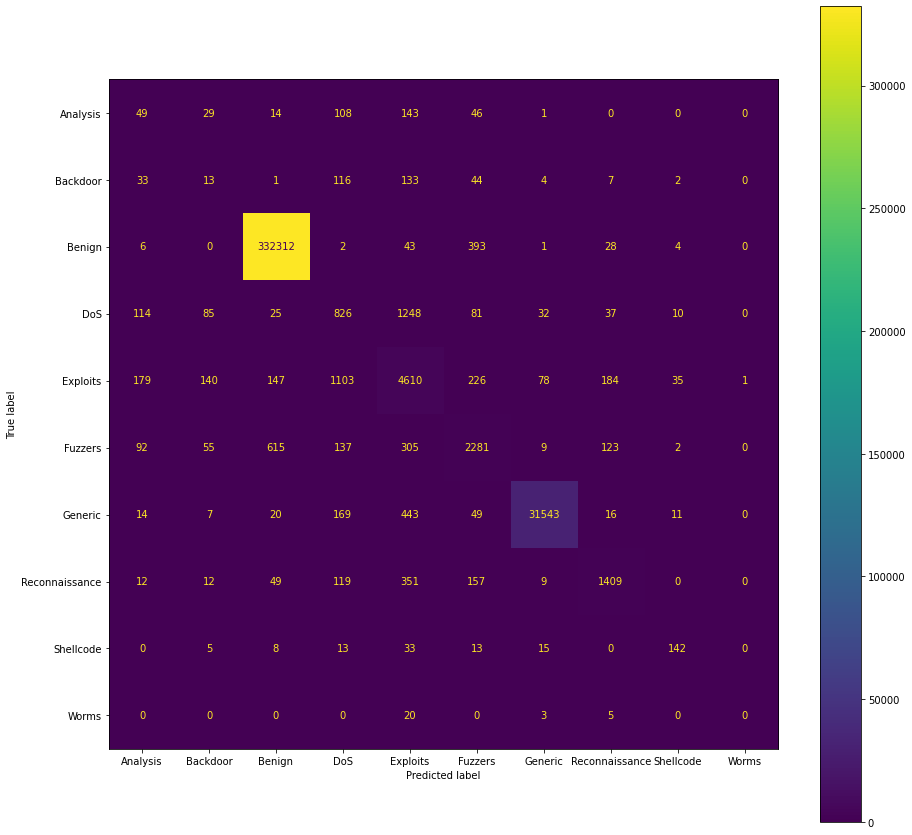

In [49]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)

# Algoritmo kNN para Test50

### Predição Test50 binária

In [50]:
predict_test50_binary = knn_train50_binary.predict(X_test50)

In [51]:
predict_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.8240614742996101

### Predição test50 multiclasse

In [71]:
predict_test50_multiclass = knn_train50_multiclass.predict(X_test50)

In [72]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [73]:
y_test50_multiclass

0          Benign
1          Benign
2          Benign
3          Benign
4          Benign
            ...  
1269859    Benign
1269860    Benign
1269861    Benign
1269862    Benign
1269863    Benign
Name: Label_multiclass, Length: 1269864, dtype: object

In [74]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.8064257274794782

### Precision e Recall do test50

In [75]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999105  0.799298  0.888102   1109226
           1   0.417928  0.995057  0.588629    160638

    accuracy                       0.824061   1269864
   macro avg   0.708517  0.897178  0.738366   1269864
weighted avg   0.925586  0.824061  0.850219   1269864



In [76]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.092308  0.147982  0.113695      1338
      Backdoor   0.070197  0.048969  0.057692      1164
        Benign   0.998984  0.799356  0.888090   1109226
           DoS   0.288255  0.461962  0.354998      8176
      Exploits   0.512756  0.659060  0.576775     22262
       Fuzzers   0.284799  0.678627  0.401219     12123
       Generic   0.352161  0.980611  0.518217    107740
Reconnaissance   0.549260  0.621050  0.582953      6993
     Shellcode   0.562654  0.606623  0.583811       755
         Worms   0.200000  0.011494  0.021739        87

      accuracy                       0.806426   1269864
     macro avg   0.391137  0.501573  0.409919   1269864
  weighted avg   0.919589  0.806426  0.839673   1269864



### Matriz de Confusão do test50

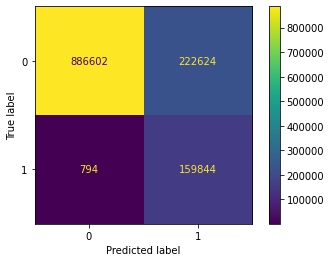

In [77]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_test50, y_test50_binary)
plt.show()

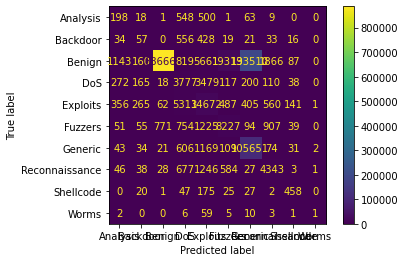

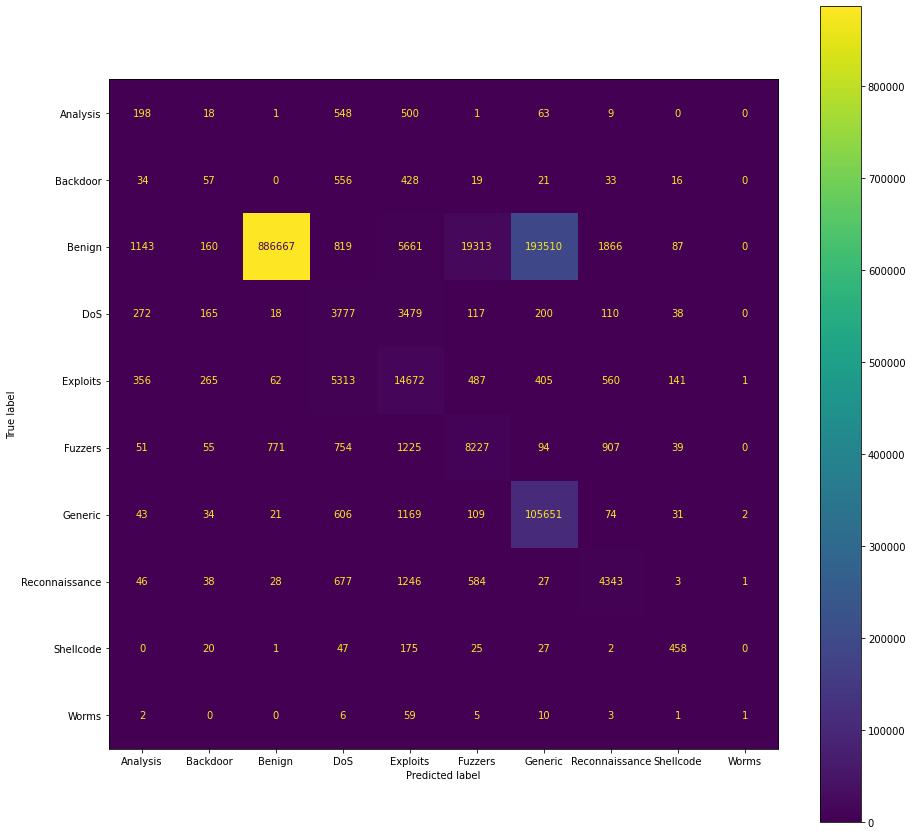

In [78]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)